In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
east=pd.read_excel("EastWestAirlines.xlsx","data")

east = east.iloc[:,1:11]
east.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [ ]:
east.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


In [ ]:
east.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [ ]:
east.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

#normalising data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
east_norm=MinMaxScaler()
east_norm

MinMaxScaler()

In [ ]:
east_data=pd.DataFrame(east_norm.fit_transform(east.iloc[:,1:]))
east_data.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


#creating dendrogram

In [ ]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

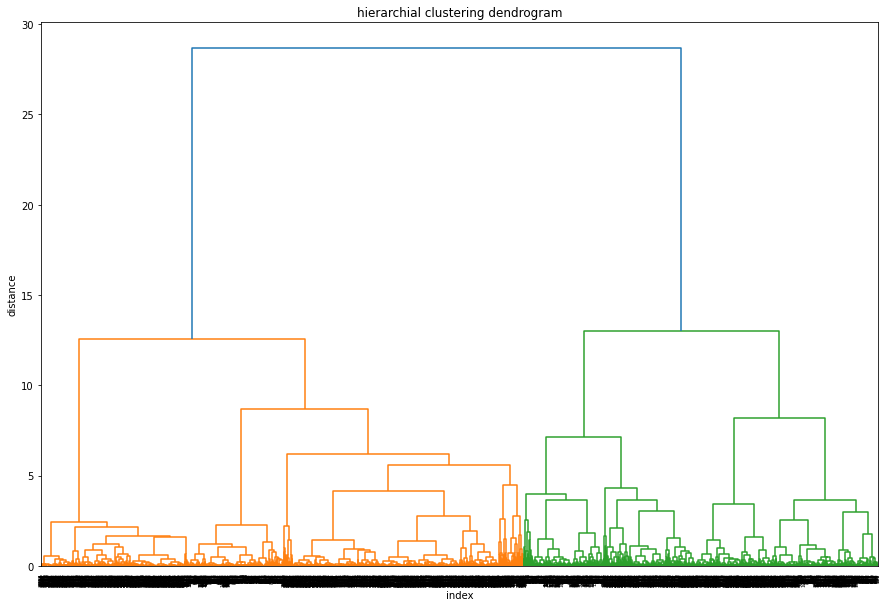

In [ ]:
z = linkage(east_data, method ='ward', metric = 'euclidean')
plt.figure(figsize=(15,10))
plt.title('hierarchial clustering dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
sch.dendrogram(z)
plt.show()



In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward').fit(east_data)


In [ ]:
cluster_labels=pd.Series(agg.labels_)
cluster_labels.head()

0    0
1    0
2    0
3    0
4    2
dtype: int64

In [ ]:
east['clust']=cluster_labels
east.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,2


In [ ]:
east.iloc[:,1:11].groupby(east.clust).mean()


,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
clust,,,,,,,,,,
0,226.397252,1.025609,1.034978,1.001874,4384.525921,6.929419,560.542786,1.712055,4778.452217,0.0
1,47.328751,2.681558,1.000000,1.000000,16898.192440,15.764032,236.612829,0.671249,4301.004582,1.0
2,125.338217,4.330891,1.002442,1.056166,54149.826618,20.818071,676.844933,2.048840,4930.904762,2.0
3,98.983003,1.000000,1.000000,1.000000,3458.617564,6.359773,256.990085,0.691218,1454.148725,3.0


In [ ]:
east_a=east[(east.clust==0)]
east_a.count()

Balance              1601
Qual_miles           1601
cc1_miles            1601
cc2_miles            1601
cc3_miles            1601
Bonus_miles          1601
Bonus_trans          1601
Flight_miles_12mo    1601
Flight_trans_12      1601
Days_since_enroll    1601
clust                1601
dtype: int64

In [ ]:
east_b=east[(east.clust==1)]
east_b.count()

Balance              873
Qual_miles           873
cc1_miles            873
cc2_miles            873
cc3_miles            873
Bonus_miles          873
Bonus_trans          873
Flight_miles_12mo    873
Flight_trans_12      873
Days_since_enroll    873
clust                873
dtype: int64

In [ ]:
east_c=east[(east.clust==2)]
east_c.count()

Balance              819
Qual_miles           819
cc1_miles            819
cc2_miles            819
cc3_miles            819
Bonus_miles          819
Bonus_trans          819
Flight_miles_12mo    819
Flight_trans_12      819
Days_since_enroll    819
clust                819
dtype: int64

In [ ]:
east_d=east[(east.clust==3)]
east_d.count()

Balance              706
Qual_miles           706
cc1_miles            706
cc2_miles            706
cc3_miles            706
Bonus_miles          706
Bonus_trans          706
Flight_miles_12mo    706
Flight_trans_12      706
Days_since_enroll    706
clust                706
dtype: int64

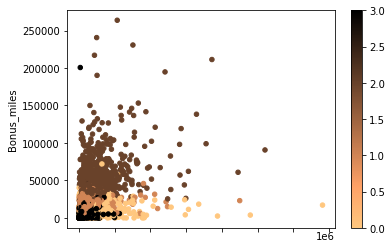

In [ ]:
east.plot(x='Balance',y='Bonus_miles',c=cluster_labels,kind='scatter',cmap=plt.cm.copper_r)
plt.show()

#kmeans custering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
east_1=pd.read_excel("EastWestAirlines.xlsx","data")
east_1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


#creating elbow curve 

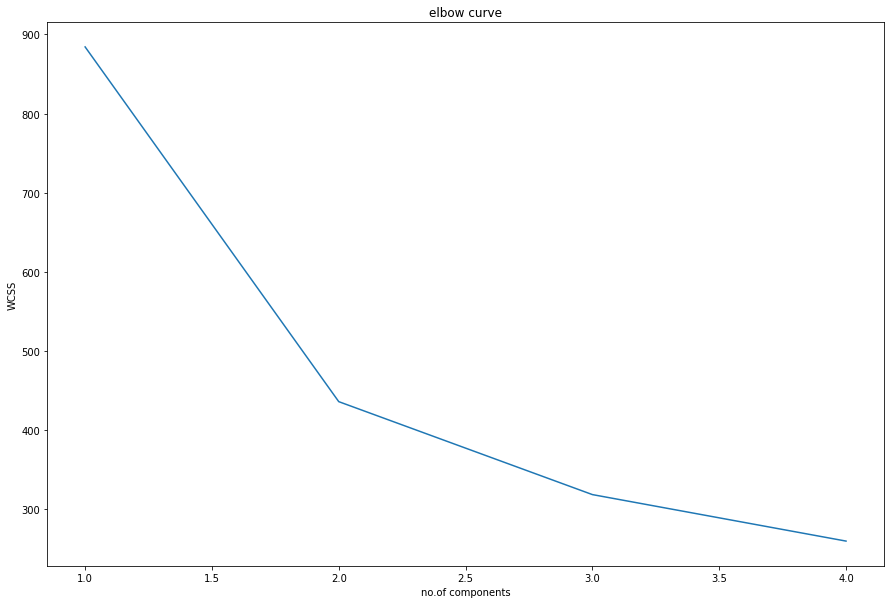

In [ ]:
fig=plt.figure(figsize=(15,10))
WCSS=[]
for i in range(1,5):
   yog=KMeans(n_clusters=i)
   yog.fit(east_data)
   WCSS.append(yog.inertia_)
plt.plot(range(1,5),WCSS)
plt.title('elbow curve')
plt.xlabel('no.of components')
plt.ylabel('WCSS')
plt.show() 


In [ ]:
east_data.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [ ]:
east_kmeans=KMeans(n_clusters=3).fit(east_data)
east_kmeans

KMeans(n_clusters=3)

In [ ]:
east_labels_kmeans = pd.Series(east_kmeans.labels_)
east_labels_kmeans

0       2
1       2
2       2
3       2
4       0
       ..
3994    1
3995    1
3996    0
3997    1
3998    1
Length: 3999, dtype: int32

In [ ]:
east_1['k_clusters'] = east_labels_kmeans
east_1.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


#grouping data into clusters

In [ ]:
east_1.iloc[:,1:11].groupby(east_1.k_clusters).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
k_clusters,,,,,,,,,,
0,113121.673023,145.239407,3.777542,1.001412,1.024718,39555.524718,18.954802,502.314972,1.490819,4699.324859
1,40400.199575,120.652512,1.108988,1.020524,1.004954,4595.738146,7.211607,394.624204,1.155697,2185.426044
2,65868.323077,171.088034,1.128205,1.023077,1.005983,5177.640171,8.005128,487.932479,1.494872,5750.314530


In [ ]:
east_ab=east_1[(east_1.k_clusters==0)]
east_ab.count()

ID#                  1416
Balance              1416
Qual_miles           1416
cc1_miles            1416
cc2_miles            1416
cc3_miles            1416
Bonus_miles          1416
Bonus_trans          1416
Flight_miles_12mo    1416
Flight_trans_12      1416
Days_since_enroll    1416
Award?               1416
k_clusters           1416
dtype: int64

In [ ]:
east_cd=east_1[(east_1.k_clusters==1)]
east_cd.count()

ID#                  1413
Balance              1413
Qual_miles           1413
cc1_miles            1413
cc2_miles            1413
cc3_miles            1413
Bonus_miles          1413
Bonus_trans          1413
Flight_miles_12mo    1413
Flight_trans_12      1413
Days_since_enroll    1413
Award?               1413
k_clusters           1413
dtype: int64

In [ ]:
east_ef=east_1[(east_1.k_clusters==2)]
east_ef.count()

ID#                  1170
Balance              1170
Qual_miles           1170
cc1_miles            1170
cc2_miles            1170
cc3_miles            1170
Bonus_miles          1170
Bonus_trans          1170
Flight_miles_12mo    1170
Flight_trans_12      1170
Days_since_enroll    1170
Award?               1170
k_clusters           1170
dtype: int64

#visualization

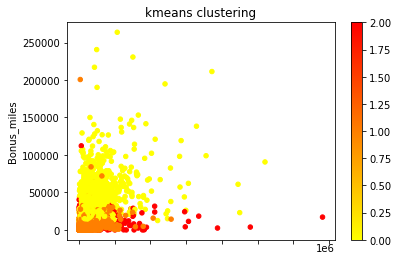

In [ ]:
east_1.plot(x='Balance',y='Bonus_miles',c=east_1.k_clusters,kind='scatter',cmap=plt.cm.autumn_r)
plt.title('kmeans clustering')
plt.show()

#DBscan clustering

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
east_2=pd.read_excel("EastWestAirlines.xlsx","data")
east_2 = east_2.iloc[:,1:11]


In [ ]:
east_2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [ ]:
from sklearn.neighbors import NearestNeighbors
nei=NearestNeighbors(n_neighbors=15).fit(east_data)
distances,indicies=nei.kneighbors(east_data)

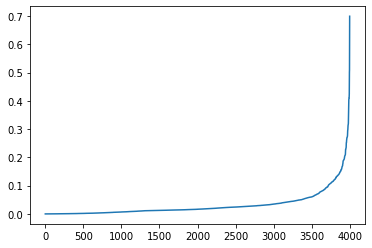

In [ ]:
yogi=np.sort(distances,axis=0)
yogi=yogi[:,1]
plt.plot(yogi)

In [ ]:
east_dbscan=DBSCAN(eps=0.15,min_samples=11)
east_dbscan.fit(east_data)

DBSCAN(eps=0.15, min_samples=11)

In [ ]:
east_dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [ ]:
east_dbscan1=pd.Series(east_dbscan.labels_)
east_dbscan1.head(10)

0    0
1    0
2    0
3    0
4    1
5    0
6    2
7    0
8   -1
9    2
dtype: int64

In [ ]:
east_2['db_cluster']=east_dbscan.labels_
east_2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,db_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,2
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
east_2.count()

Balance              3999
Qual_miles           3999
cc1_miles            3999
cc2_miles            3999
cc3_miles            3999
Bonus_miles          3999
Bonus_trans          3999
Flight_miles_12mo    3999
Flight_trans_12      3999
Days_since_enroll    3999
db_cluster           3999
dtype: int64

#grouping data into clusters

In [ ]:
east_2.iloc[:,1:11].groupby(east_2.db_cluster).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,db_cluster
db_cluster,,,,,,,,,,
-1,1607.436293,2.698842,1.177606,1.189189,46315.563707,26.108108,3029.953668,8.949807,4591.459459,-1.0
0,56.822796,1.000000,1.000000,1.000000,3259.115367,5.956161,309.464698,0.932164,3733.994462,0.0
1,33.469602,4.000000,1.000000,1.000000,39059.859539,18.270440,298.014675,0.880503,4768.406709,1.0
2,13.768439,3.000000,1.000000,1.000000,19513.843911,16.108062,208.859348,0.586621,4313.780446,2.0
3,19.485075,2.000000,1.000000,1.000000,10749.503731,14.298507,153.880597,0.492537,4240.339552,3.0
4,32.785408,5.000000,1.000000,1.000000,70882.248927,19.914163,332.562232,1.098712,5290.266094,4.0
5,0.000000,1.000000,2.000000,1.000000,8287.583333,12.416667,145.833333,0.416667,2571.500000,5.0


In [ ]:
east_y=east_2[(east_2.db_cluster==-1)]
east_y.count()

Balance              259
Qual_miles           259
cc1_miles            259
cc2_miles            259
cc3_miles            259
Bonus_miles          259
Bonus_trans          259
Flight_miles_12mo    259
Flight_trans_12      259
Days_since_enroll    259
db_cluster           259
dtype: int64

In [ ]:
east_o=east_2[(east_2.db_cluster==2)]
east_o.count()

Balance              583
Qual_miles           583
cc1_miles            583
cc2_miles            583
cc3_miles            583
Bonus_miles          583
Bonus_trans          583
Flight_miles_12mo    583
Flight_trans_12      583
Days_since_enroll    583
db_cluster           583
dtype: int64

In [ ]:
east_g=east_2[(east_2.db_cluster==3)]
east_g.count()

Balance              268
Qual_miles           268
cc1_miles            268
cc2_miles            268
cc3_miles            268
Bonus_miles          268
Bonus_trans          268
Flight_miles_12mo    268
Flight_trans_12      268
Days_since_enroll    268
db_cluster           268
dtype: int64

In [ ]:
east_e=east_2[(east_2.db_cluster==4)]
east_e.count()

Balance              233
Qual_miles           233
cc1_miles            233
cc2_miles            233
cc3_miles            233
Bonus_miles          233
Bonus_trans          233
Flight_miles_12mo    233
Flight_trans_12      233
Days_since_enroll    233
db_cluster           233
dtype: int64

In [ ]:
east_s=east_2[(east_2.db_cluster==5)]
east_s.count()

Balance              12
Qual_miles           12
cc1_miles            12
cc2_miles            12
cc3_miles            12
Bonus_miles          12
Bonus_trans          12
Flight_miles_12mo    12
Flight_trans_12      12
Days_since_enroll    12
db_cluster           12
dtype: int64

In [ ]:
noise=east_2[(east_2.db_cluster==-1)]
noise.count()

Balance              259
Qual_miles           259
cc1_miles            259
cc2_miles            259
cc3_miles            259
Bonus_miles          259
Bonus_trans          259
Flight_miles_12mo    259
Flight_trans_12      259
Days_since_enroll    259
db_cluster           259
dtype: int64

In [ ]:
east_h=east_2[(east_2.db_cluster==0)]
east_h.count()

Balance              2167
Qual_miles           2167
cc1_miles            2167
cc2_miles            2167
cc3_miles            2167
Bonus_miles          2167
Bonus_trans          2167
Flight_miles_12mo    2167
Flight_trans_12      2167
Days_since_enroll    2167
db_cluster           2167
dtype: int64

In [ ]:
east_i=east_2[(east_2.db_cluster==)]
east_i.count()

SyntaxError: ignored

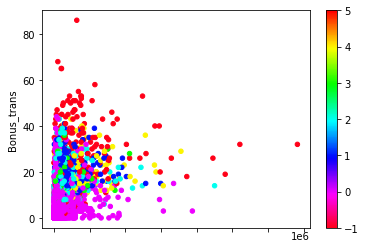

In [ ]:
east_2.plot(x='Balance',y='Bonus_trans',c=east_2.db_cluster,kind='scatter',cmap=plt.cm.hsv_r)
plt.show()

#finding silhouette score

In [ ]:
import  sklearn
sklearn.metrics.silhouette_score(east_data, east_2.db_cluster)

0.21991705170193301

In [ ]:
sklearn.metrics.silhouette_score(east_data,east_1.k_clusters)

0.41241181763121776

In [ ]:
sklearn.metrics.silhouette_score(east_data,east.clust)

0.29749349127011937